In [2]:
import os
from pathlib import Path

ROOT = Path(r"C:\Users\othni\Projects\mvtec_ad\data")  # <-- sans \mvtec à la fin
print(ROOT)
print(ROOT.exists())

categories = sorted([d.name for d in ROOT.iterdir() if d.is_dir()])
print("Catégories MVTec AD :")
print(categories)
print(f"\nNombre de catégories : {len(categories)}")

C:\Users\othni\Projects\mvtec_ad\data
True
Catégories MVTec AD :
['bottle', 'cable', 'capsule', 'carpet', 'grid', 'hazelnut', 'leather', 'metal_nut', 'pill', 'screw', 'tile', 'toothbrush', 'transistor', 'wood', 'zipper']

Nombre de catégories : 15


# 1️ Explorer train / test / ground_truth pour chaque catégorie

In [3]:
from collections import defaultdict

def explore_category(cat_name):
    cat_root = ROOT / cat_name
    print(f"\n=== {cat_name} ===")

    # 1) train/good
    train_root = cat_root / "train"
    if train_root.exists():
        good_dir = train_root / "good"
        n_good = len(list(good_dir.glob("*.png")))
        print(f"  train/good : {n_good} images")
    else:
        print("  train/ : (absent)")

    # 2) test/* (good + défauts)
    test_root = cat_root / "test"
    if test_root.exists():
        subdirs = [d for d in test_root.iterdir() if d.is_dir()]
        for sd in sorted(subdirs, key=lambda p: p.name):
            n_img = len(list(sd.glob("*.png")))
            print(f"  test/{sd.name} : {n_img} images")
    else:
        print("  test/ : (absent)")

    # 3) ground_truth/* (seulement défauts)
    gt_root = cat_root / "ground_truth"
    if gt_root.exists():
        subdirs = [d for d in gt_root.iterdir() if d.is_dir()]
        for sd in sorted(subdirs, key=lambda p: p.name):
            n_mask = len(list(sd.glob("*.png")))
            print(f"  ground_truth/{sd.name} : {n_mask} masques")
    else:
        print("  ground_truth/ : (absent)")

for cat in categories:
    explore_category(cat)


=== bottle ===
  train/good : 209 images
  test/broken_large : 20 images
  test/broken_small : 22 images
  test/contamination : 21 images
  test/good : 20 images
  ground_truth/broken_large : 20 masques
  ground_truth/broken_small : 22 masques
  ground_truth/contamination : 21 masques

=== cable ===
  train/good : 224 images
  test/bent_wire : 13 images
  test/cable_swap : 12 images
  test/combined : 11 images
  test/cut_inner_insulation : 14 images
  test/cut_outer_insulation : 10 images
  test/good : 58 images
  test/missing_cable : 12 images
  test/missing_wire : 10 images
  test/poke_insulation : 10 images
  ground_truth/bent_wire : 13 masques
  ground_truth/cable_swap : 12 masques
  ground_truth/combined : 11 masques
  ground_truth/cut_inner_insulation : 14 masques
  ground_truth/cut_outer_insulation : 10 masques
  ground_truth/missing_cable : 12 masques
  ground_truth/missing_wire : 10 masques
  ground_truth/poke_insulation : 10 masques

=== capsule ===
  train/good : 219 images

# 2️ Visualiser 1 image + 1 masque (ex: bottle, broken_large)

Types de défaut pour bottle : ['broken_large', 'broken_small', 'contamination']
On affiche un exemple pour : broken_large
Image : C:\Users\othni\Projects\mvtec_ad\data\bottle\test\broken_large\012.png
Mask  : C:\Users\othni\Projects\mvtec_ad\data\bottle\ground_truth\broken_large\012_mask.png (exists: True )


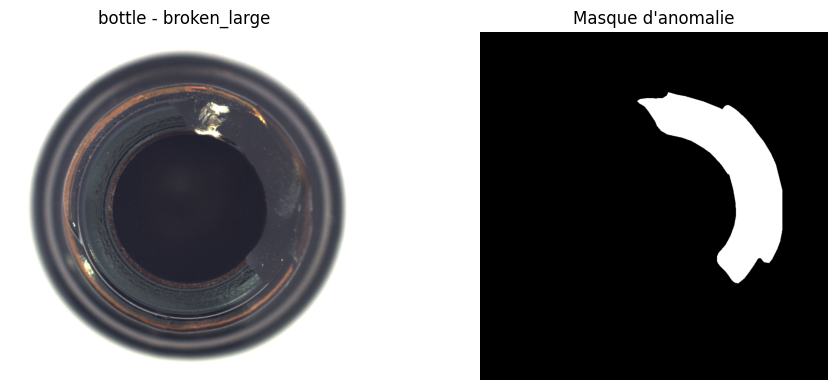

In [4]:
import random
from PIL import Image
import matplotlib.pyplot as plt

def show_example_with_mask(category="bottle"):
    cat_root = ROOT / category
    
    # On prend un type de défaut (différent de 'good')
    test_root = cat_root / "test"
    defect_types = [d.name for d in test_root.iterdir() if d.is_dir() and d.name != "good"]
    defect_types = sorted(defect_types)
    print("Types de défaut pour", category, ":", defect_types)
    defect_type = defect_types[0]  # on en prend un au hasard, ici le premier
    print("On affiche un exemple pour :", defect_type)

    # On prend une image dans ce dossier
    defect_dir = test_root / defect_type
    img_paths = sorted(defect_dir.glob("*.png"))
    img_path = random.choice(img_paths)
    
    # Construire le chemin du masque correspondant
    # MVTec : ground_truth/<defect_type>/<same_name>_mask.png
    gt_root = cat_root / "ground_truth" / defect_type
    mask_name = img_path.name.replace(".png", "_mask.png")
    mask_path = gt_root / mask_name
    
    print("Image :", img_path)
    print("Mask  :", mask_path, "(exists:", mask_path.exists(), ")")

    # Charger image + mask
    img = Image.open(img_path).convert("RGB")
    if mask_path.exists():
        mask = Image.open(mask_path).convert("L")
    else:
        mask = None

    # Affichage
    plt.figure(figsize=(10, 4))

    plt.subplot(1, 2, 1)
    plt.title(f"{category} - {defect_type}")
    plt.imshow(img)
    plt.axis("off")

    plt.subplot(1, 2, 2)
    if mask is not None:
        plt.title("Masque d'anomalie")
        plt.imshow(mask, cmap="gray")
    else:
        plt.title("Masque introuvable")
    plt.axis("off")

    plt.tight_layout()
    plt.show()

show_example_with_mask("bottle")